\* means that I can change the parameter there
\** means that I'm already changing its parameter

n=100 for group size
small, mid, large for clustering effect of WS graph
number of neighbors, treshold, adopting v sharing (use sharing)
use sharing in the simple model 

benefir visibile and researchers have a handle on 

## 1 - Make Graph

In [1]:
#for the seperate python doucument
from __future__ import print_function, division

%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# import thinkplot
import networksimulator as ns
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

In [ ]:
lattice = ns.make_ring_lattice(20, 5)
nx.draw_circular(lattice, 
                 node_color=COLORS[0], 
                 node_size=1000, 
                 with_labels=True)

In [ ]:
ws = ns.make_ws_graph(20, 5, 0.6)
nx.draw_circular(ws, 
                 node_color=COLORS[1], 
                 node_size=1000, 
                 with_labels=True)

In [ ]:
#checking clustering and average path length
(nx.average_clustering(ws),
nx.average_clustering(lattice),
nx.average_shortest_path_length(ws),
nx.average_shortest_path_length(lattice))

In [ ]:
len(lattice.edges()), len(ws.edges())

## 2 - Visualize single Step

In [2]:
import agent as a
import propagate as p

In [14]:
########## making graph ###########
#make a graph
ws = nx.watts_strogatz_graph(50, 4, 0.4, seed=11)
#initialize a network of agent
ws_di = a.initialize_network_agent(ws)
#initialize treshold
    
for i in range(50): #network_size
    ws_di.get(i).change_tresh(2) #treshold_index
    
#seed the rumor
a.initialize_patient_zero(ws,ws_di, 0.8) #patient_zero_percentage     

# numbers
infection = []
suspect = []
clean = []

In [15]:
p.step(ws, ws_di)

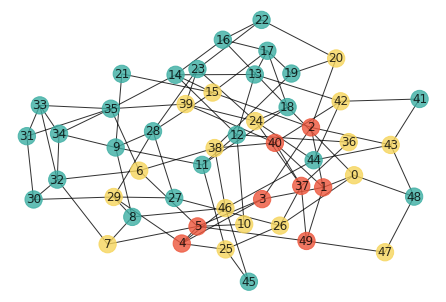

In [18]:
#visualize + keep track of infection, suspect and clean
color_map = []
#initialize
infection_num = 0
sus_num = 0
clean_num = 0

for i in range (len(ws_di)):
    #see if neighbor infected
    neighbors = [n for n in ws.neighbors(i)]
    total_infected = 0
    for j in neighbors:
        if ws_di.get(j).infected == 1:
            total_infected += 1  
    if ws_di.get(i).infected == 1:
        color_map.append('#ED553B') # red
        infection_num += 1
    elif total_infected > 0:
        color_map.append('#F6D55C') #yellow
        sus_num += 1
    else: 
        color_map.append('#3CAEA3') # green 
        
clean_num = len(ws_di) - infection_num - sus_num
infection.append(infection_num)
suspect.append(sus_num)
clean.append(clean_num)

nx.draw_kamada_kawai(ws, node_size=300,node_color=color_map, with_labels=True, alpha = 0.8)    
p.step(ws,ws_di)

In [19]:
suspect

[13, 17, 17]

## 3 -  Visualize trend

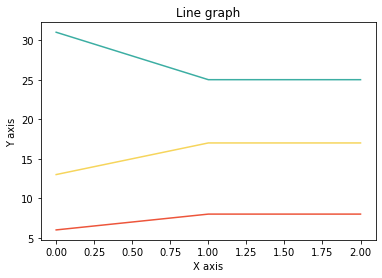

In [20]:
# build second visualization with 
import numpy as np  
import matplotlib.pyplot as plt 

# data to be plotted 
x = np.arange(0, len(suspect))  

#y = np.array(a) 
  
# plotting 
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(x, suspect, color ='#F6D55C')  # yellow
plt.plot(x, infection, color ='#ED553B') #red
plt.plot(x, clean, color ='#3CAEA3') #green
plt.show()